# Deep Neural Network with Keras - Fashion MNIST Dataset

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

# import warnings
# warnings.filterwarnings('ignore')

## Import/ View Dataset

In [2]:
# load the Fashion-MNIST train_dataset downloaded from kaggle.com
train = pd.read_csv("datasets/fashionmnist/fashion-mnist_train.csv")

In [3]:
print(f"Train shape : {train.shape}")

Train shape : (60000, 785)


In [4]:
print(f"Train Null-values? : {train.isnull().sum().any()}")

Train Null-values? : False


In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f"Labels: {train.label.unique()}")
print(f"Max Value: {train.to_numpy().max()}")
print(f"Min Value: {train.to_numpy().min()}")

Labels: [2 9 6 0 3 4 5 8 7 1]
Max Value: 255
Min Value: 0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
y = train['label']
X = train.drop('label', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [9]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_val, return_counts=True)
print("\nValidation labels: ", dict(zip(unique, counts)))

Train labels:  {0: 4801, 1: 4796, 2: 4794, 3: 4806, 4: 4774, 5: 4783, 6: 4852, 7: 4776, 8: 4816, 9: 4802}

Validation labels:  {0: 1199, 1: 1204, 2: 1206, 3: 1194, 4: 1226, 5: 1217, 6: 1148, 7: 1224, 8: 1184, 9: 1198}


In [ ]:
# sns.countplot(x=y_val)

In [10]:
# sample 25 images from train dataset
indexes = np.random.randint(0, X.shape[0], size=25)

In [11]:
indexes

array([55757, 17052,  9635, 41282, 46183, 15773, 46111, 48833,  4937,
         765, 49899, 23953, 26191,  8738, 22237,  7352,  7800, 23428,
       53016,  3915, 56388, 50488,  9320, 44802,  5983])

In [12]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

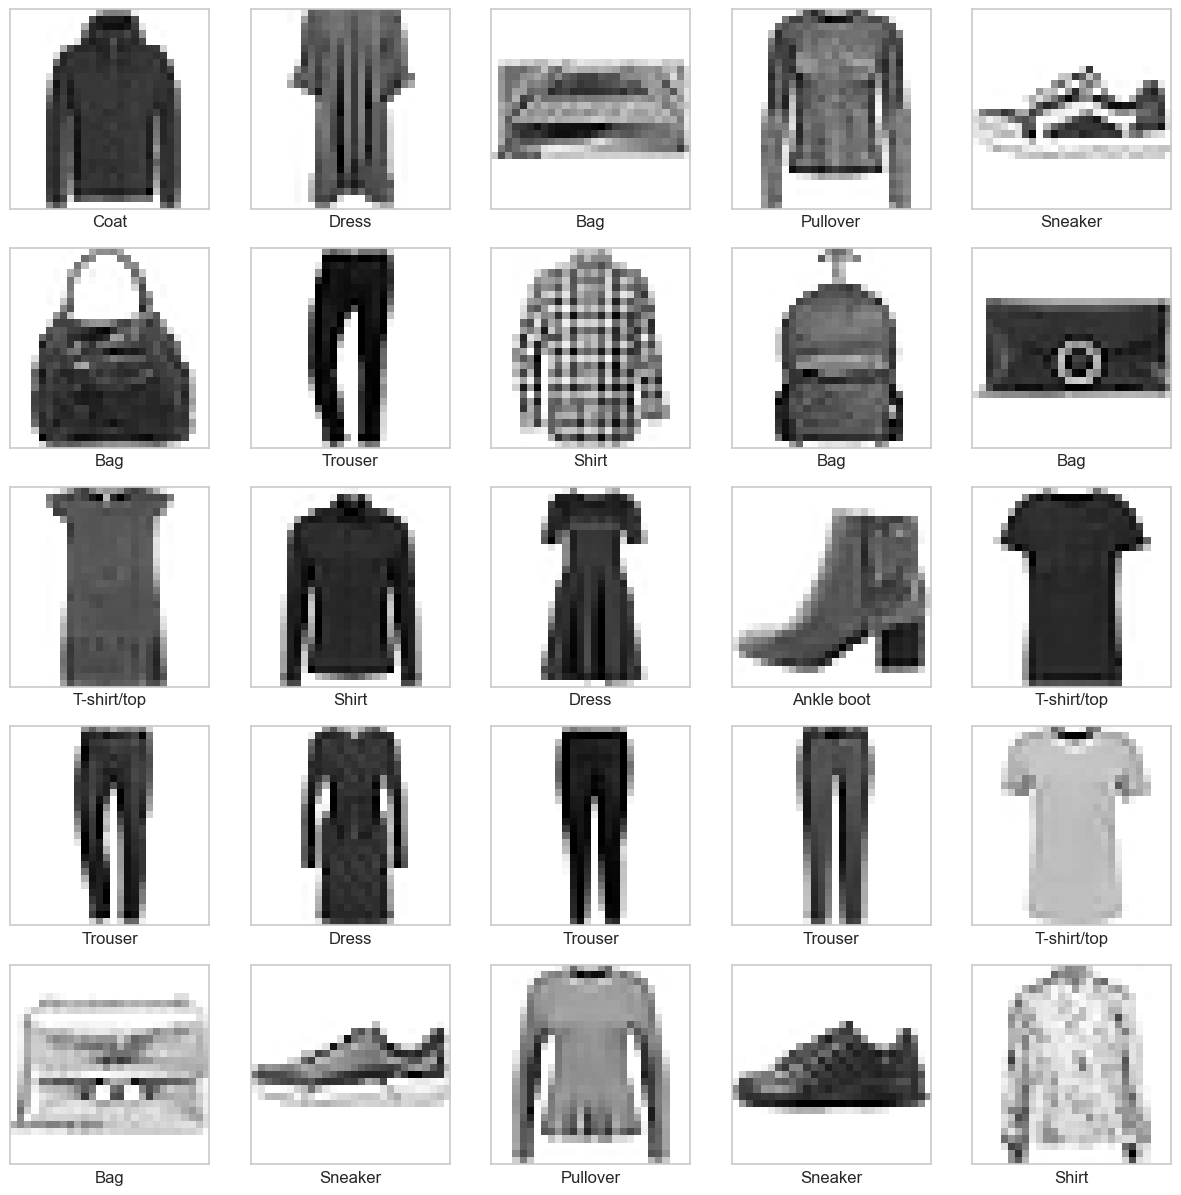

In [13]:
plt.figure(figsize=(15,15)); i=1
for l in indexes:
    plt.subplot(5,5,i);     i=i+1
    plt.xticks([]);    plt.yticks([]);    plt.grid(False)
    plt.imshow(np.array(X.iloc[l]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y[l]])

## Design Model Architecture

In [14]:
# Import Keras layers

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
# from keras.utils import to_categorical, plot_model

In [15]:
# compute the number of (output) labels

num_labels = len(np.unique(y_val))

In [16]:
num_labels

10

In [17]:
#normalize to avoid large gradient values that could make training difficult
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255

In [18]:
# model is a 3-layer MLP with ReLU activation function

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu', ))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [20]:
# Compile the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Implement them MLP model

In [22]:
# Train the model
model.fit( X_train, y_train, epochs=10, validation_data=(X_val, y_val) )

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.6061 - accuracy: 0.7791 - val_loss: 0.4458 - val_accuracy: 0.8363
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4560 - accuracy: 0.8379 - val_loss: 0.4037 - val_accuracy: 0.8542
Epoch 3/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.4114 - accuracy: 0.8524 - val_loss: 0.3640 - val_accuracy: 0.8666
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3874 - accuracy: 0.8607 - val_loss: 0.3920 - val_accuracy: 0.8532
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3751 - accuracy: 0.8658 - val_loss: 0.3532 - val_accuracy: 0.8740
Epoch 6/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3614 - accuracy: 0.8701 - val_loss: 0.3485 - val_accuracy: 0.8740
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3504 - accuracy: 0.8742 - val_loss: 0.3304 - 

In [23]:
history_dict = model.history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

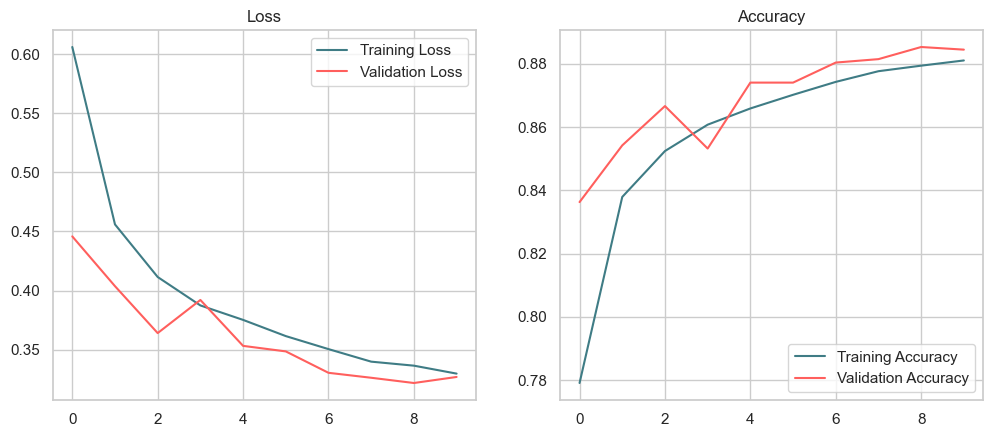

In [24]:
# View learning history in terms of loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)
ax1.plot(model.history.history['loss'], label='Training Loss'); ax1.plot(model.history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()
ax2.plot(model.history.history['accuracy'], label='Training Accuracy'); ax2.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()

# Evaluate the model with the Test Set

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
# load the Fashion-MNIST test_dataset downloaded from kaggle.com
test = pd.read_csv("datasets/fashionmnist/fashion-mnist_test.csv")

In [27]:
print(f"Test shape  : {test.shape}")
print(f"Test Null-values?   : {test.isnull().sum().any()}")

Test shape  : (10000, 785)
Test Null-values?   : False


In [28]:
X_test = test.drop('label', axis=1)
y_test = test['label']

In [29]:
X_test = X_test.astype('float32') / 255

In [30]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
predictions[1]

array([2.7265748e-26, 1.0000000e+00, 3.6722156e-25, 1.3641043e-21,
       1.9443445e-22, 0.0000000e+00, 8.2656540e-25, 0.0000000e+00,
       9.5433035e-31, 0.0000000e+00], dtype=float32)

In [32]:
np.argmax(predictions[1])

1

In [33]:
predict_labels = []
for pred in predictions:
    predict_labels.append(np.argmax(pred))

In [34]:
predict_labels[:10]

[0, 1, 2, 2, 3, 6, 8, 2, 5, 0]

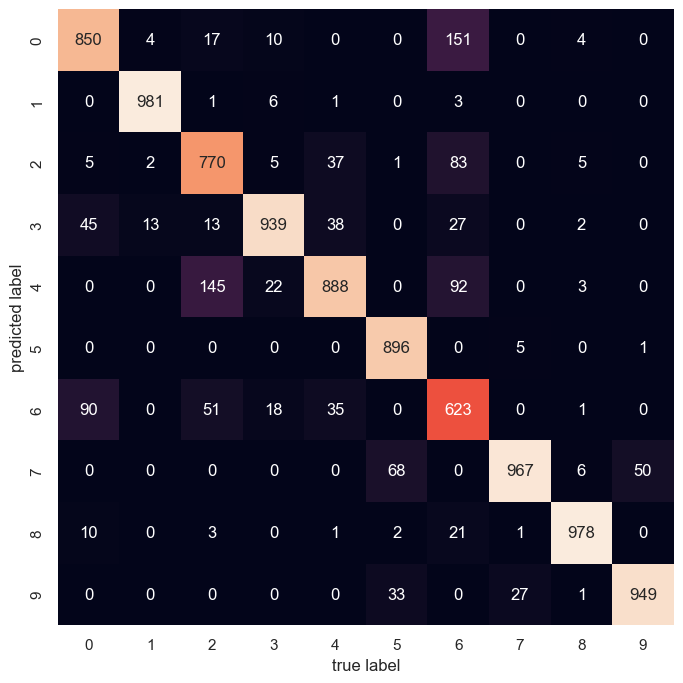

In [35]:
mat = confusion_matrix(y_test, predict_labels)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [36]:
target_names = ["Class {}".format(i) for i in range(num_labels)]
print(classification_report(y_test, predict_labels, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.85      0.83      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.85      0.77      0.81      1000
     Class 3       0.87      0.94      0.90      1000
     Class 4       0.77      0.89      0.83      1000
     Class 5       0.99      0.90      0.94      1000
     Class 6       0.76      0.62      0.69      1000
     Class 7       0.89      0.97      0.92      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [37]:
# 3. Evaluate the model performance

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*test_acc:.2f}%")
print(f"Test loss     : {100*test_loss:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8841
Test accuracy : 88.41%
Test loss     : 32.26%


# References

- https://www.kaggle.com/code/farahshamseddin/dl-task-2
- https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist
- https://www.kaggle.com/code/pavansanagapati/a-simple-cnn-model-beginner-guide